**Circuito RLC Serie**
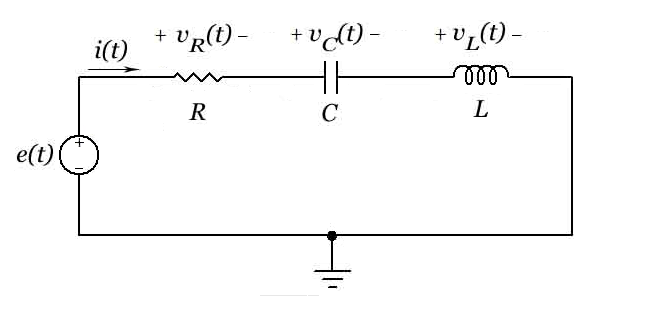

$e(t) = V_0\sin(\omega t)$

Reattanza induttiva $X_L = \omega L$

Reattanza capacitiva $X_C = \frac{1}{\omega C}$

Induttanza $Z = sqrt(R^2-(X_L - X_C)^2)$

Angolo di sfasamento tra corrente e tensione $\theta = \arctan (\frac{X_L-X_C}{R})$

Corrente $I(t) = I_{max}\sin(\omega t + \theta)$

$I_{max}=\frac{V_0}{Z}$

Frequenza di Risonanza $f = \frac{1}{\sqrt(LC)}$

In [ ]:
frequenza = 250 # @param {"type":"number","placeholder":"Hz"}
import numpy as np
import matplotlib.pyplot as plt

# Valori da modificare

#frequenza = 20 #Hertz

V_0 = 100 # Volt, ampiezza massima della tensione

R = 100 # Ohm
L = 100e-3 # Henry
C = 100e-6 # Farad

# Calcolo valori delle Reattanze induttive e capacitive e
# dell'impedenza

X_L = 2*np.pi*frequenza*L
X_C = 1/(2*np.pi*frequenza*C)
Z = np.sqrt(R**2 + (X_L-X_C)**2)
print("La reattanza induttiva è: ", X_L, "Ohm")
print("La reattanza capacitiva è: ", X_C, "Ohm")
print("L'impedenza è: ", Z, "Ohm")

# Calcola Il valore massimo della corrente e
# l'angolo di sfasamento tra corrente e tensione

I_max = V_0/Z
theta_max = np.arctan((X_L-X_C)/R)

print("Il valore massimo della corrente è: ", I_max, "A")
print("L'angolo di sfasamento tra corrente e tensione è: ", theta_max, "rad")

# Calcola la frequenza di risonanza, con i valori di L e C

f_R = 1/(2*np.pi*np.sqrt(L*C))
print("La frequenza di risonanza è: ", f_R, "Hz")

I_ris = V_0/R
print("Il valore massimo della corrente in frequenza di risonanza è: ", I_ris, "A")

La reattanza induttiva è:  157.07963267948966 Ohm
La reattanza capacitiva è:  6.366197723675814 Ohm
L'impedenza è:  180.87161047599574 Ohm
Il valore massimo della corrente è:  0.5528783634802181 A
L'angolo di sfasamento tra corrente e tensione è:  0.9849816997058516 rad
La frequenza di risonanza è:  50.329212104487034 Hz
Il valore massimo della corrente in frequenza di risonanza è:  1.0 A


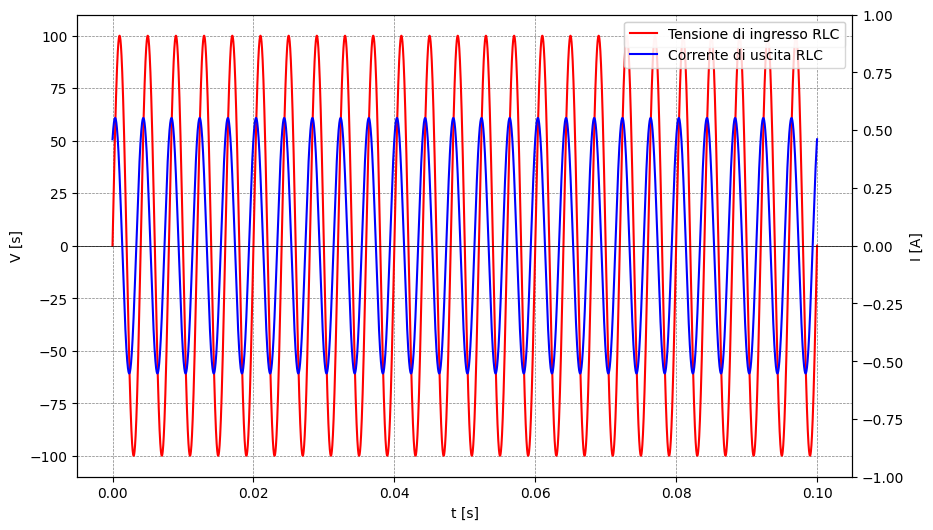

In [ ]:
t = np.linspace(0, 0.1, 10000)   # tempo in secondi

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

y=V_0*np.sin(2*np.pi*frequenza*t)
i=I_max*np.sin(2*np.pi*frequenza*t+theta_max)

ax1.plot(t, y, label=r'Tensione di ingresso RLC', color='red')
ax1.set_xlabel('t [s]')
ax1.set_ylabel('V [s]')


ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.plot(t, i, label=r'Corrente di uscita RLC', color='blue')
ax2.set_ylabel('I [A]')

# fissa i limiti in y del grafico in corrente
ax2.set_ylim(-I_ris, I_ris)

ax1.axhline(0, color='black',linewidth=0.5)
ax1.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Display the plot
plt.show()

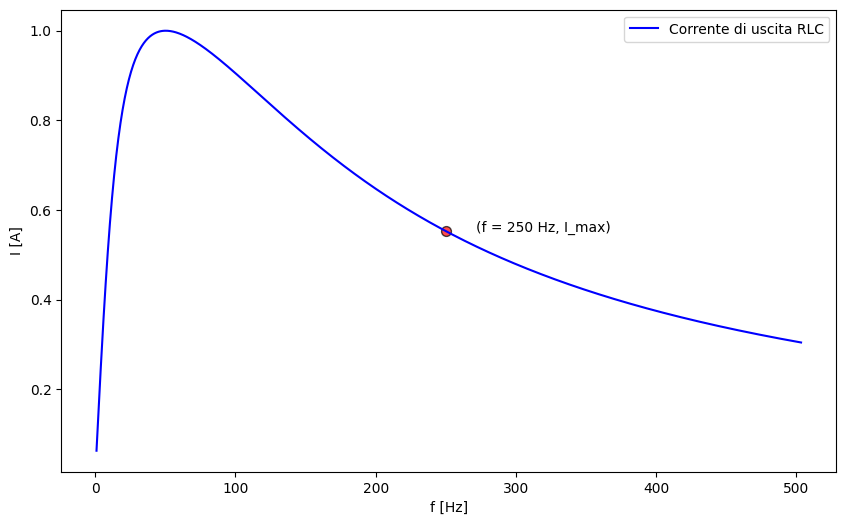

In [ ]:
# Calcola I_max al variare della frequenza attorno al valore di risonanza
f=np.linspace(1, 10*f_R,1000)

X_Lvar = 2*np.pi*f*L
X_Cvar = 1/(2*np.pi*f*C)
Zvar = np.sqrt(R**2 + (X_Lvar-X_Cvar)**2)
I_var = V_0/Zvar

# create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(f, I_var, label=r'Corrente di uscita RLC', color='blue')
ax1.set_xlabel('f [Hz]')
ax1.set_ylabel('I [A]')


ax1.legend(loc='upper right')
# inserisci nel grafico il punto (frequenza, I_max)

ax1.scatter(frequenza, I_max, s=50, c='red', alpha=0.7, edgecolors='black')
Testo='(f = '+str(frequenza)+' Hz, I_max)'
ax1.annotate(Testo, (frequenza, I_max), textcoords="offset points", xytext=(70,0), ha='center')

# Display the plot
plt.show()